<a href="https://colab.research.google.com/github/GIT-kiran-kumar/Deep-Learning/blob/main/Building_a_Logistic_Regression_Classifier_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets

# loading training data
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
#loading test data
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 100057304.83it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 103446365.35it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24696172.31it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22491769.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

number of training samples: 60000
number of testing samples: 10000


In [3]:
print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())

datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])


In [4]:
# check the label of first two training sample
print("label of the first taining sample: ", train_dataset[0][1])
print("label of the second taining sample: ", train_dataset[1][1])

label of the first taining sample:  5
label of the second taining sample:  0


In [8]:
import matplotlib. pyplot as plt

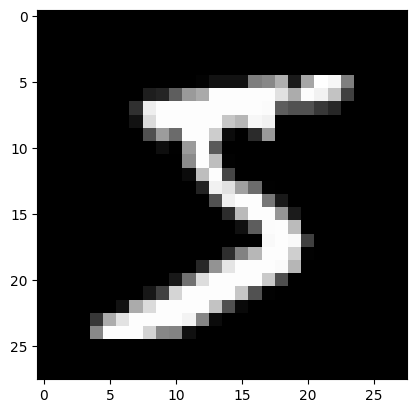

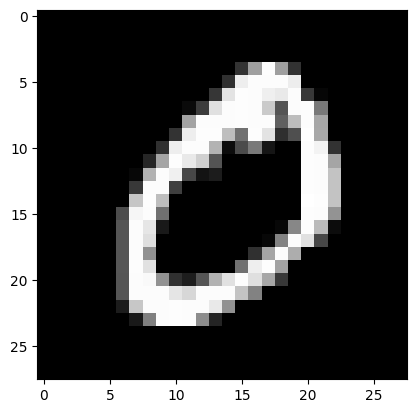

In [9]:
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

**Load Dataset into DataLoader**

In [10]:
...
from torch.utils.data import DataLoader

# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

**Build the model with nn. module**

In [11]:
# build custom module for logistic regression
class LogisticRegression(torch.nn.Module):
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [12]:
# instantiate the model
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

**Training the Classifier**

In [14]:
...

# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()

epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 1.6590888500213623. Accuracy: 86.49
Epoch: 1. Loss: 1.6930506229400635. Accuracy: 86.48
Epoch: 2. Loss: 1.6236933469772339. Accuracy: 86.51
Epoch: 3. Loss: 1.6989408731460571. Accuracy: 86.51
Epoch: 4. Loss: 1.69505774974823. Accuracy: 86.6
Epoch: 5. Loss: 1.6674468517303467. Accuracy: 86.62
Epoch: 6. Loss: 1.6531555652618408. Accuracy: 86.65
Epoch: 7. Loss: 1.6540447473526. Accuracy: 86.72
Epoch: 8. Loss: 1.7214934825897217. Accuracy: 86.72
Epoch: 9. Loss: 1.7091355323791504. Accuracy: 86.73
Epoch: 10. Loss: 1.6229251623153687. Accuracy: 86.74
Epoch: 11. Loss: 1.7262165546417236. Accuracy: 86.76
Epoch: 12. Loss: 1.6875232458114624. Accuracy: 86.78
Epoch: 13. Loss: 1.621401071548462. Accuracy: 86.79
Epoch: 14. Loss: 1.6608169078826904. Accuracy: 86.82
Epoch: 15. Loss: 1.6819459199905396. Accuracy: 86.86
Epoch: 16. Loss: 1.5794552564620972. Accuracy: 86.93
Epoch: 17. Loss: 1.6334960460662842. Accuracy: 86.97
Epoch: 18. Loss: 1.6839267015457153. Accuracy: 86.98
Epoch: 19.

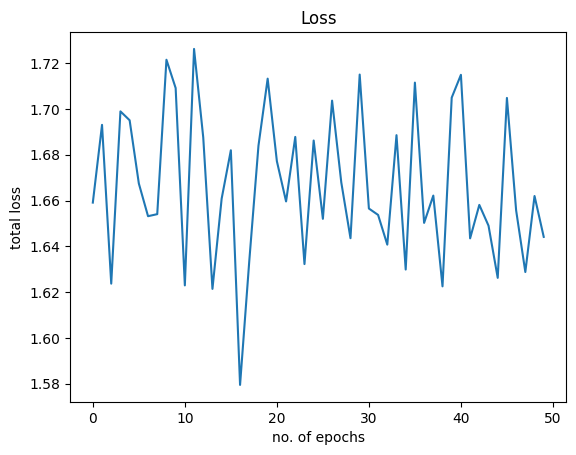

In [15]:
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

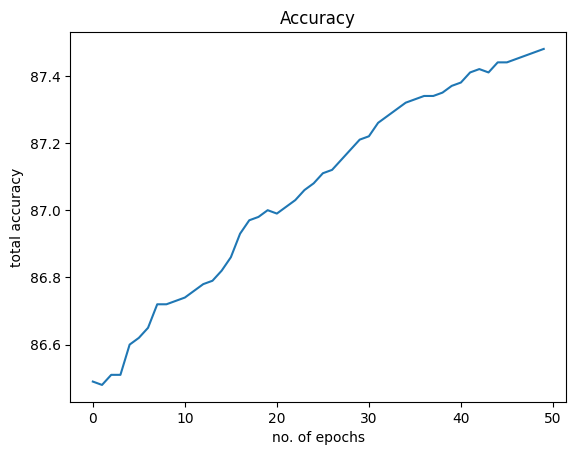

In [16]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()